### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
  plt.figure(figsize = figsize)
  plt.style.use('ggplot')
  plt.barh(labels, bars_length)
  ticks = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
  plt.yticks(ticks, labels = yticks_labels)
  plt.xlim(left = -10, right = 10)
  for i, v in enumerate(bars_length):
    plt.text((bars_length[i]+0.5) if bars_length[i]>=0 else 0.5, ticks[i], labels[i], fontsize = 25, va='center')
  plt.show()

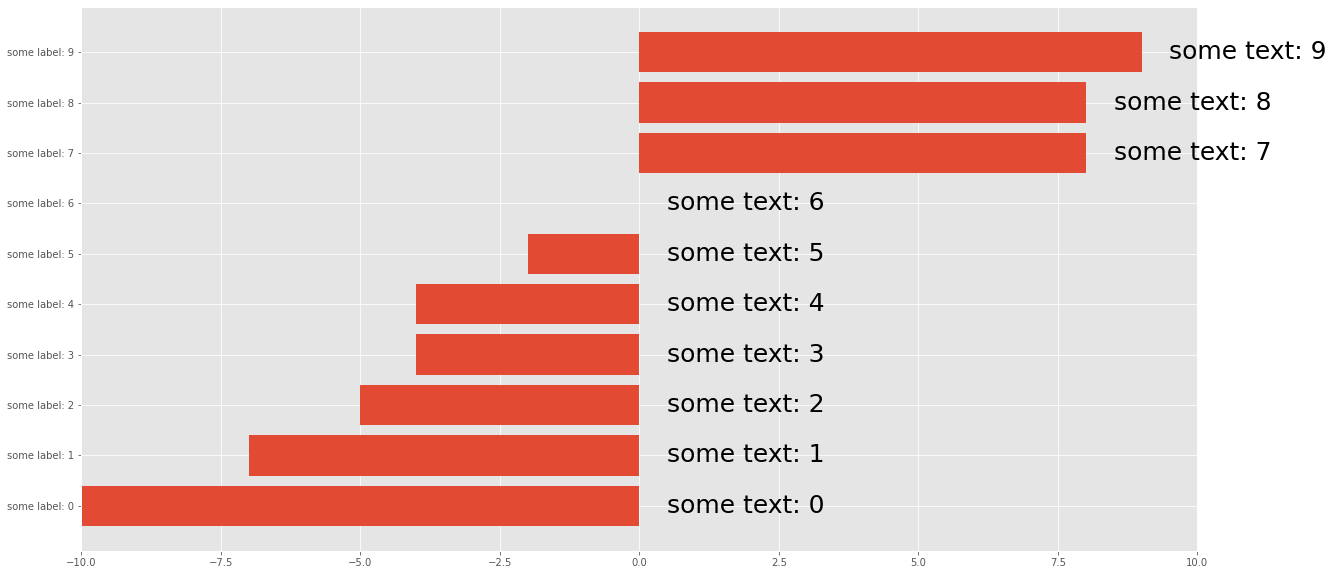

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [ ]:
from matplotlib.cm import get_cmap
from datetime import timedelta

def plot_time_probabilities(probs, figsize):
  probs_np = np.array(probs)
  plt.figure(figsize=figsize)
  plt.style.use('ggplot')
  r = get_cmap()
  fills = [0 for i in range(len(probs.columns))]

  for i in probs.columns[1:]:

    plt.plot(probabilities_in_time.index, 
             np.sum(probs_np[:,:i], axis = 1), 
             label='Probability: {}'.format(i-1), 
             linewidth=0.2, 
             color=r.colors[i*20])
    
    fills[i-1] = plt.fill_between(probabilities_in_time.index, 
                     np.sum(probs_np[:,:i-1], axis = 1), 
                     np.sum(probs_np[:,:i], axis = 1), 
                     color=r.colors[i*20], 
                     alpha=0.5) 

  plt.plot(probabilities_in_time.index, 
           np.sum(probs_np[:,:len(probs.columns)], axis = 1), 
           label='Probability: {}'.format(len(probs.columns)-1), 
           linewidth=0.2, 
           color=r.colors[200])
  
  fills[len(probs.columns)-1] = plt.fill_between(probabilities_in_time.index,
                   np.sum(probs_np[:,:len(probs.columns)-1], axis = 1),
                   np.sum(probs_np[:,:len(probs.columns)], axis = 1), 
                   color=r.colors[200], 
                   alpha=0.5) 

  list_probs = ['Probability: {}'.format(i) for i in range(len(probs.columns))]

  plt.legend(fills, list_probs, prop={'size': 16})
  plt.grid(False)
  plt.xlim(probabilities_in_time.index[0] - timedelta(days = 100), probabilities_in_time.index[208] + timedelta(days = 100))
  plt.show()

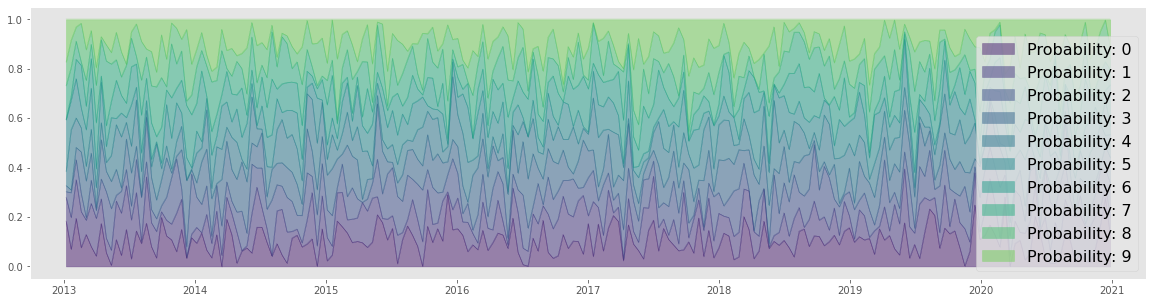

In [ ]:
# Сигнатура функции и пример вывода:
import pandas as pd

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

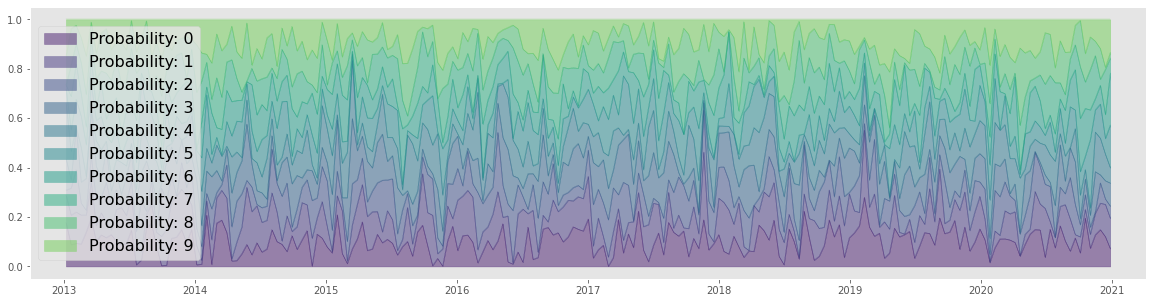

In [ ]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [ ]:
def plot_intraday_ts(intraday_ts, figsize):

  amount_elem = int(np.array(intraday_ts).shape[0]/24)
  intraday_ts_np = np.resize(np.array(intraday_ts),[amount_elem+1, 24])
  left_elem = np.array(intraday_ts).shape[0] - 24*amount_elem
  intraday_ts_np[151] = intraday_ts_np[151, 0:1]
  intraday_ts_np_T = intraday_ts_np.T

  dates = [intraday_ts.index.to_pydatetime()[24*i].date() 
            for i in range(intraday_ts_np.shape[0])]
  times = [intraday_ts.index.to_pydatetime()[i].time() for i in range(24)]

  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(111)
  im = ax.imshow(intraday_ts_np_T)
  ax.set_yticks(range(24))
  ax.set_yticklabels(times, fontdict= {'fontsize': 10},)
  ax.set_xticks(np.array(range(0, intraday_ts_np.shape[0])))
  ax.set_xticklabels(dates, 
                     fontdict= {'fontsize': 10},
                     rotation = 70)
  ax.set_xlabel('Дата')
  ax.set_ylabel('Время')
  ax.grid(True)

  cbar = fig.colorbar(ax=ax, mappable=im, orientation='vertical', shrink = 0.5)

  plt.show()

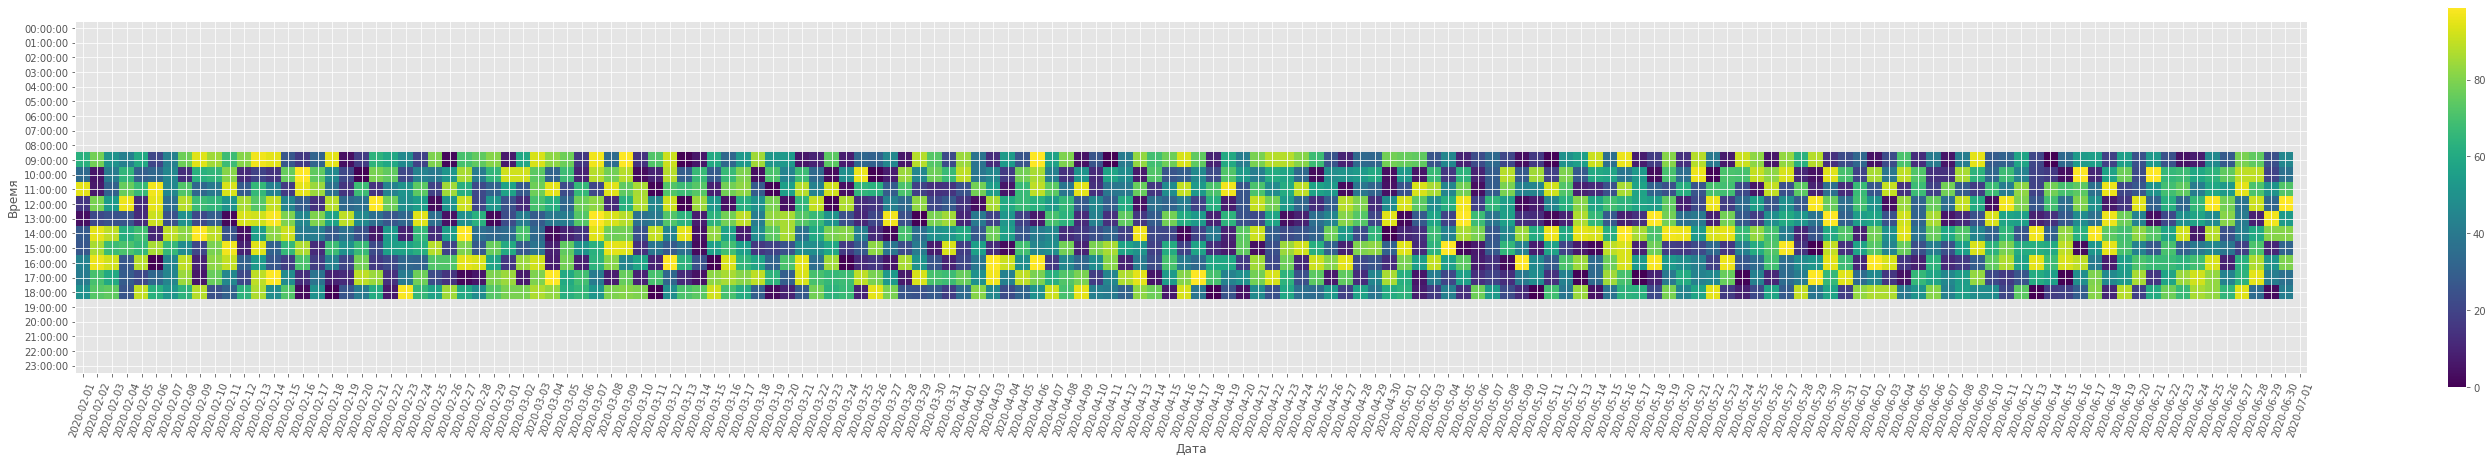

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (50, 14)

plot_intraday_ts(intraday_ts, figsize)

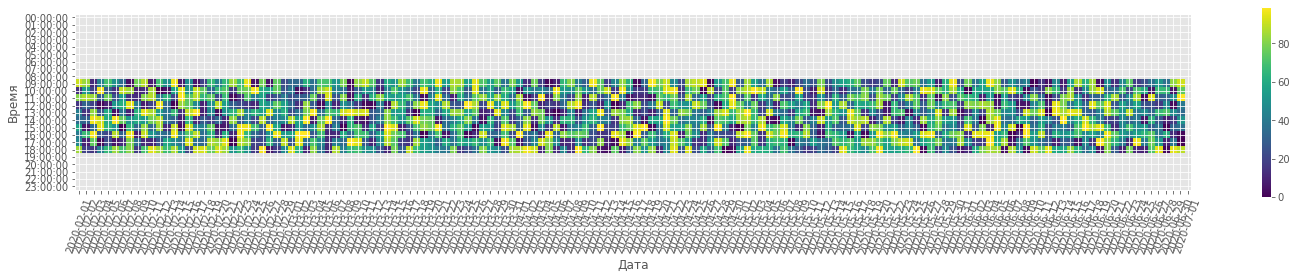

In [ ]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)